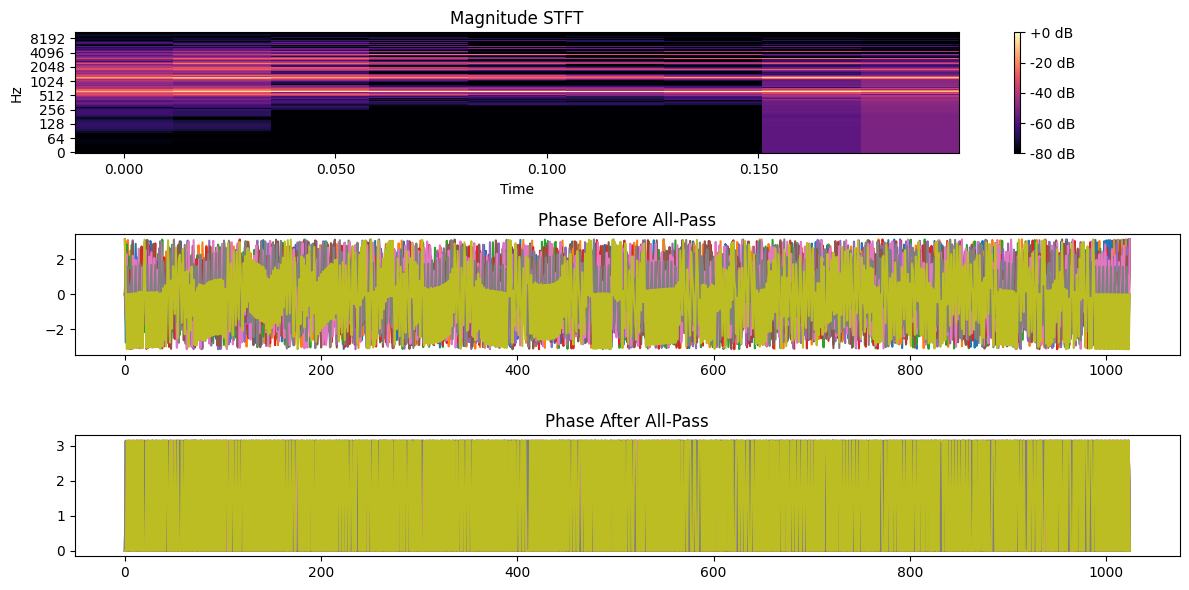

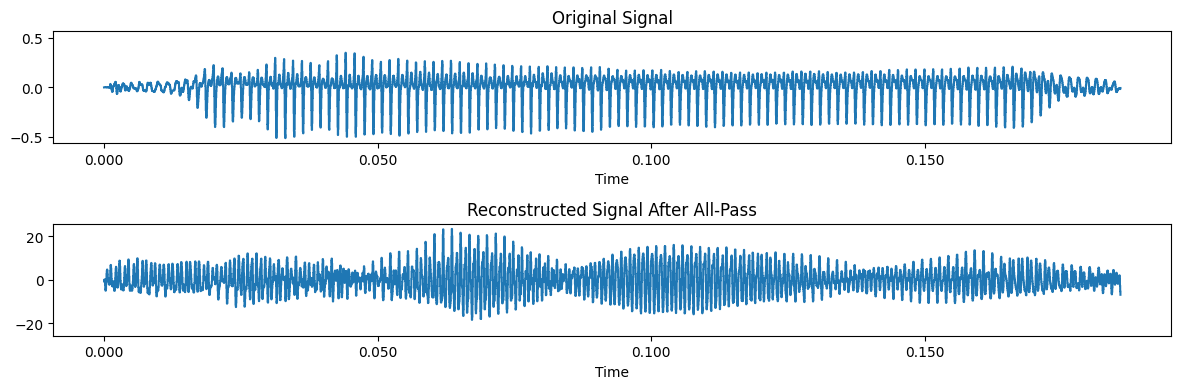

In [27]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math

# Erzeugung eines Beispielsignals
y, sr = librosa.load(librosa.ex('trumpet'))
y = y[:4096]

# STFT
D = librosa.stft(y)
magnitude = np.abs(D)
phase = np.angle(D)

# Apply All-Pass-Filter auf Phase
all_pass_phase = phase**5

# iSTFT
synth_D = magnitude * all_pass_phase
y_hat = librosa.istft(synth_D)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude STFT')

plt.subplot(3, 1, 2)
plt.plot(phase)
plt.title('Phase Before All-Pass')

plt.subplot(3, 1, 3)
plt.plot(np.angle(all_pass_phase))
plt.title('Phase After All-Pass')

plt.tight_layout()

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_hat, sr=sr)
plt.title('Reconstructed Signal After All-Pass')

plt.tight_layout()
plt.show()

In [30]:
import IPython.display as ipd#can play audio files with a simple GUI
ipd.Audio(y,rate=sr)#original

In [31]:
ipd.Audio(y_hat,rate=sr)#all-pass-filtered